<a href="https://colab.research.google.com/github/shr2023-ai/Data-Science-project/blob/main/Capston_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview and Theoretical Insights:
The dataset appears to contain information about health insurance charges and various factors that might influence these charges. This type of data is crucial for insurance companies to price their policies appropriately and for researchers to understand the determinants of health insurance costs.

Key Variables:

a) Age:

Theory: Age is typically a significant factor in health insurance pricing. As people get older, they generally require more medical care, leading to higher insurance costs.
Insight: Analyze the relationship between age and charges. It's likely to be positive but may not be strictly linear.
b) Sex:

Theory: Biological sex can influence health risks and healthcare utilization patterns.
Insight: While gender-based pricing is often regulated, differences in average charges between males and females might reflect underlying health trends or societal factors.
c) BMI (Body Mass Index):

Theory: BMI is used as a proxy for overall health status. Higher BMI is often associated with increased health risks.
Insight: Examine how BMI correlates with charges. There might be a threshold effect where charges increase more rapidly above certain BMI levels.
d) Children:

Theory: The number of children could influence insurance charges in multiple ways. It might reflect family size, which could affect coverage needs, or it could be a proxy for age and life stage.
Insight: Investigate how the number of children relates to charges. The relationship might not be linear.
e) Smoker:

Theory: Smoking is a major health risk factor and is typically associated with significantly higher insurance premiums.
Insight: Expect to see a substantial difference in charges between smokers and non-smokers. This might be one of the strongest predictors in the dataset.
f) Region:

Theory: Healthcare costs can vary by geographic region due to differences in living costs, healthcare infrastructure, and regional health trends.
Insight: Look for systematic differences in charges across regions, which could reflect these underlying factors.
Data Analysis and Feature Extraction Insights:
a) Distribution of Charges:

Theory: Insurance charges often follow a right-skewed distribution, with most policies having lower charges and a few having very high charges.
Insight: This skewness might suggest the need for log transformation of the target variable or the use of models that can handle non-normal distributions.
b) Correlation Analysis:

Theory: Correlations between predictors and the target variable (charges) indicate the strength of linear relationships.
Insight: Strong correlations (e.g., with age or BMI) suggest important predictors. However, be cautious of multicollinearity among predictors.
c) Interaction Effects:

Theory: The impact of one variable on charges might depend on the level of another variable.
Insight: Look for potential interactions, such as between age and smoker status, or BMI and sex. These could be important for accurate modeling.
Model Building and Prediction Insights:
a) Linear Regression:

Theory: Assumes a linear relationship between predictors and the target variable.
Insight: While useful for interpretability, it might not capture complex relationships in the data, especially if there are significant interaction effects.
b) Random Forest:

Theory: Can capture non-linear relationships and interactions without explicit specification.
Insight: Likely to perform well if there are complex relationships in the data. Feature importance from this model can provide valuable insights.
c) Support Vector Regression (SVR):

Theory: Can model non-linear relationships using kernel functions.
Insight: Might perform well, especially if there are non-linear patterns that aren't easily captured by simpler models.
d) Feature Importance:

Theory: Different features contribute differently to predicting insurance charges.
Insight: Expect smoking status, age, and BMI to be among the most important features. The relative importance can guide feature selection and provide business insights.
e) Model Evaluation:

Theory: R-squared measures the proportion of variance explained, while MSE quantifies prediction error.
Insight: Compare these metrics across models. A high R-squared with low MSE indicates good predictive power.
Ethical and Practical Considerations:
a) Fairness:

Theory: Insurance pricing should be fair and non-discriminatory.
Insight: Be cautious about how sex and region influence predictions, as using these factors might raise ethical concerns or legal issues in some

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# checking the data
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/datasets_13720_18513_insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Check for missing values in the dataset
df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Summary statistics for categorical columns
df.describe(include='object')


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
df['sex'].value_counts()



,count
sex,
male,676
female,662


In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


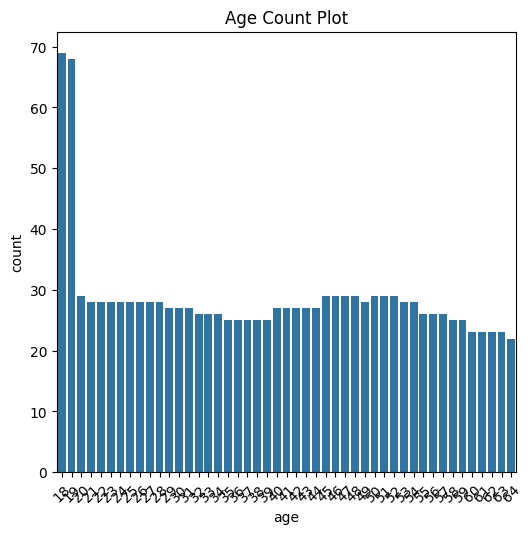

In [ ]:
# plot countplots for age, sex,number of children, smoker, region
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.countplot(x='age', data=df)
plt.title('Age Count Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

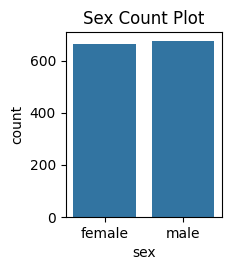

In [ ]:
plt.subplot(2, 3, 2)
sns.countplot(x='sex', data=df)
plt.title('Sex Count Plot')
plt.tight_layout()
plt.show()

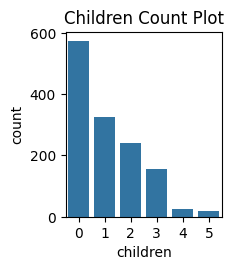

In [ ]:
plt.subplot(2, 3, 3)
sns.countplot(x='children', data=df)
plt.title('Children Count Plot')
plt.tight_layout()
plt.show()

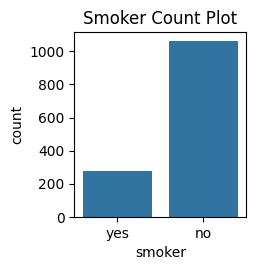

In [ ]:
plt.subplot(2, 3, 4)
sns.countplot(x='smoker', data=df)
plt.title('Smoker Count Plot')
plt.tight_layout()
plt.show()

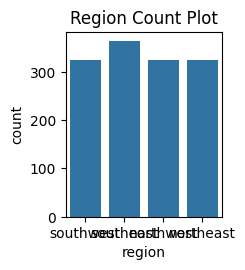

In [ ]:
plt.subplot(2, 3, 5)
sns.countplot(x='region', data=df)
plt.title('Region Count Plot')
plt.tight_layout()
plt.show()

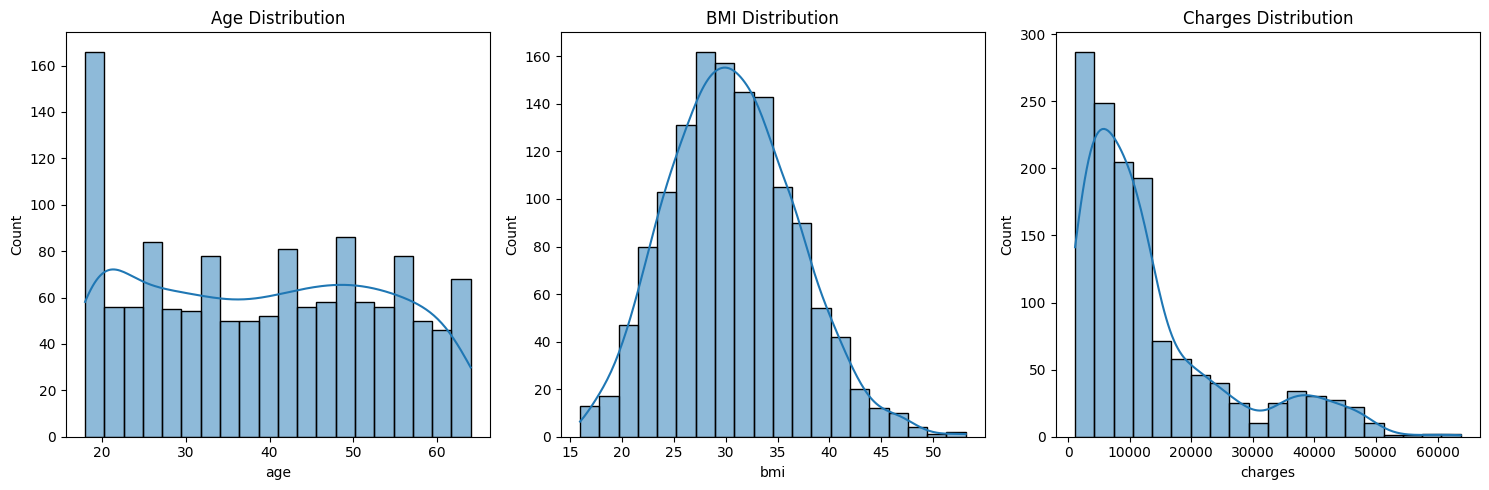

In [ ]:
plt.figure(figsize=(15, 5))

# Plot histplot for 'age'
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')

# Plot histplot for 'bmi'
plt.subplot(1, 3, 2)
sns.histplot(df['bmi'], kde=True, bins=20)
plt.title('BMI Distribution')

# Plot histplot for 'charges'
plt.subplot(1, 3, 3)
sns.histplot(df['charges'], kde=True, bins=20)
plt.title('Charges Distribution')


plt.tight_layout()
plt.show()

The analysis shows the distribution of age, BMI, and charges in the dataset.

Age Distribution: The age distribution is relatively even across the range of 20 to 60 years old, with a slight peak around 20.

BMI Distribution: The BMI distribution is approximately normally distributed with a mean around 30 and a standard deviation of around 5.

Charges Distribution: The charges distribution is right-skewed, meaning that there are more people with lower charges and fewer people with higher charges.
The distribution is also slightly bimodal, indicating that there are two peaks in the distribution. This could be due to different factors such as age, health conditions, or lifestyle choices.

Overall, the analysis indicates that the dataset is relatively representative of the general population in terms of age and BMI, but that there is a significant variation in charges. This is consistent with what we would expect from a dataset on medical insurance.

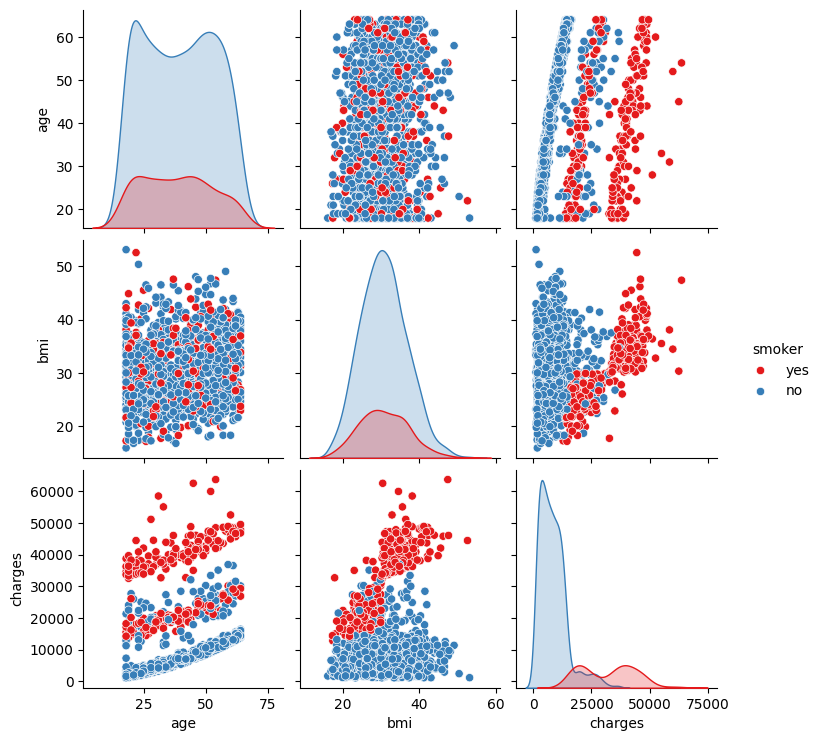

In [ ]:
# pairplot to check the trend
sns.pairplot(df[['age', 'bmi', 'charges', 'smoker']], hue='smoker', palette='Set1')
plt.show()

This analysis shows the relationship between different factors and insurance charges. It indicates that smokers tend to have higher charges than non-smokers. There is also a correlation between age and charges, suggesting that older people tend to have higher insurance charges. Additionally, there seems to be a relationship between BMI and charges, but it is not as strong as the relationship between smoking and charges.

To summarize:

Smokers have significantly higher charges than non-smokers.

Age is positively correlated with charges, meaning older people tend to pay more.

BMI is also somewhat correlated with charges, but the relationship is less clear compared to smoking and age.

In [ ]:
le = LabelEncoder()


In [ ]:
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

In [ ]:
data = pd.get_dummies(df, columns=['region'], drop_first=True)

In [ ]:
print(data.head())

   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [ ]:
corr_matrix = data.corr()
corr_with_target = corr_matrix['charges'].sort_values(ascending=False)
print("Correlation with target (charges):\n", corr_with_target)

Correlation with target (charges):
 charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


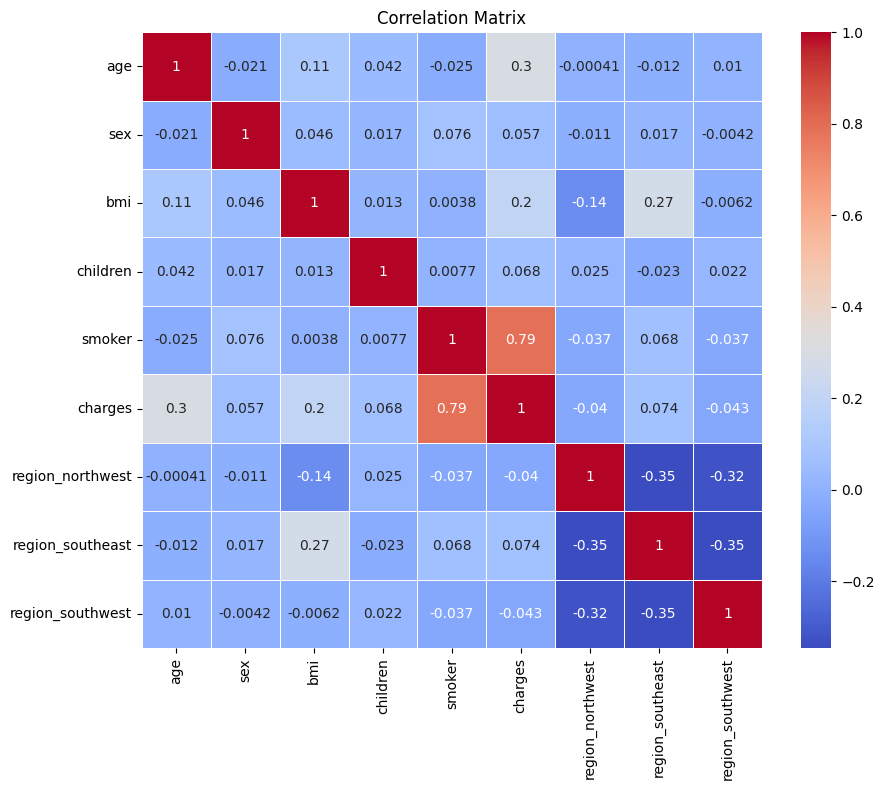

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
strong_corr_features = corr_with_target[corr_with_target.abs() > 0.5].index.tolist()
strong_corr_features.remove('charges')  # Remove the target variable

print("Selected features based on correlation:", strong_corr_features)

Selected features based on correlation: ['smoker']


In [ ]:
print(df.describe())

               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            charges  
count   1338.000000  
mean   13270.422265  
std    12110.011237  
min     1121.873900  
25%     4740.287150  
50%     9382.033000  
75%    16639.912515  
max    63770.428010  


<ipython-input-7-5f58e6bd366f>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


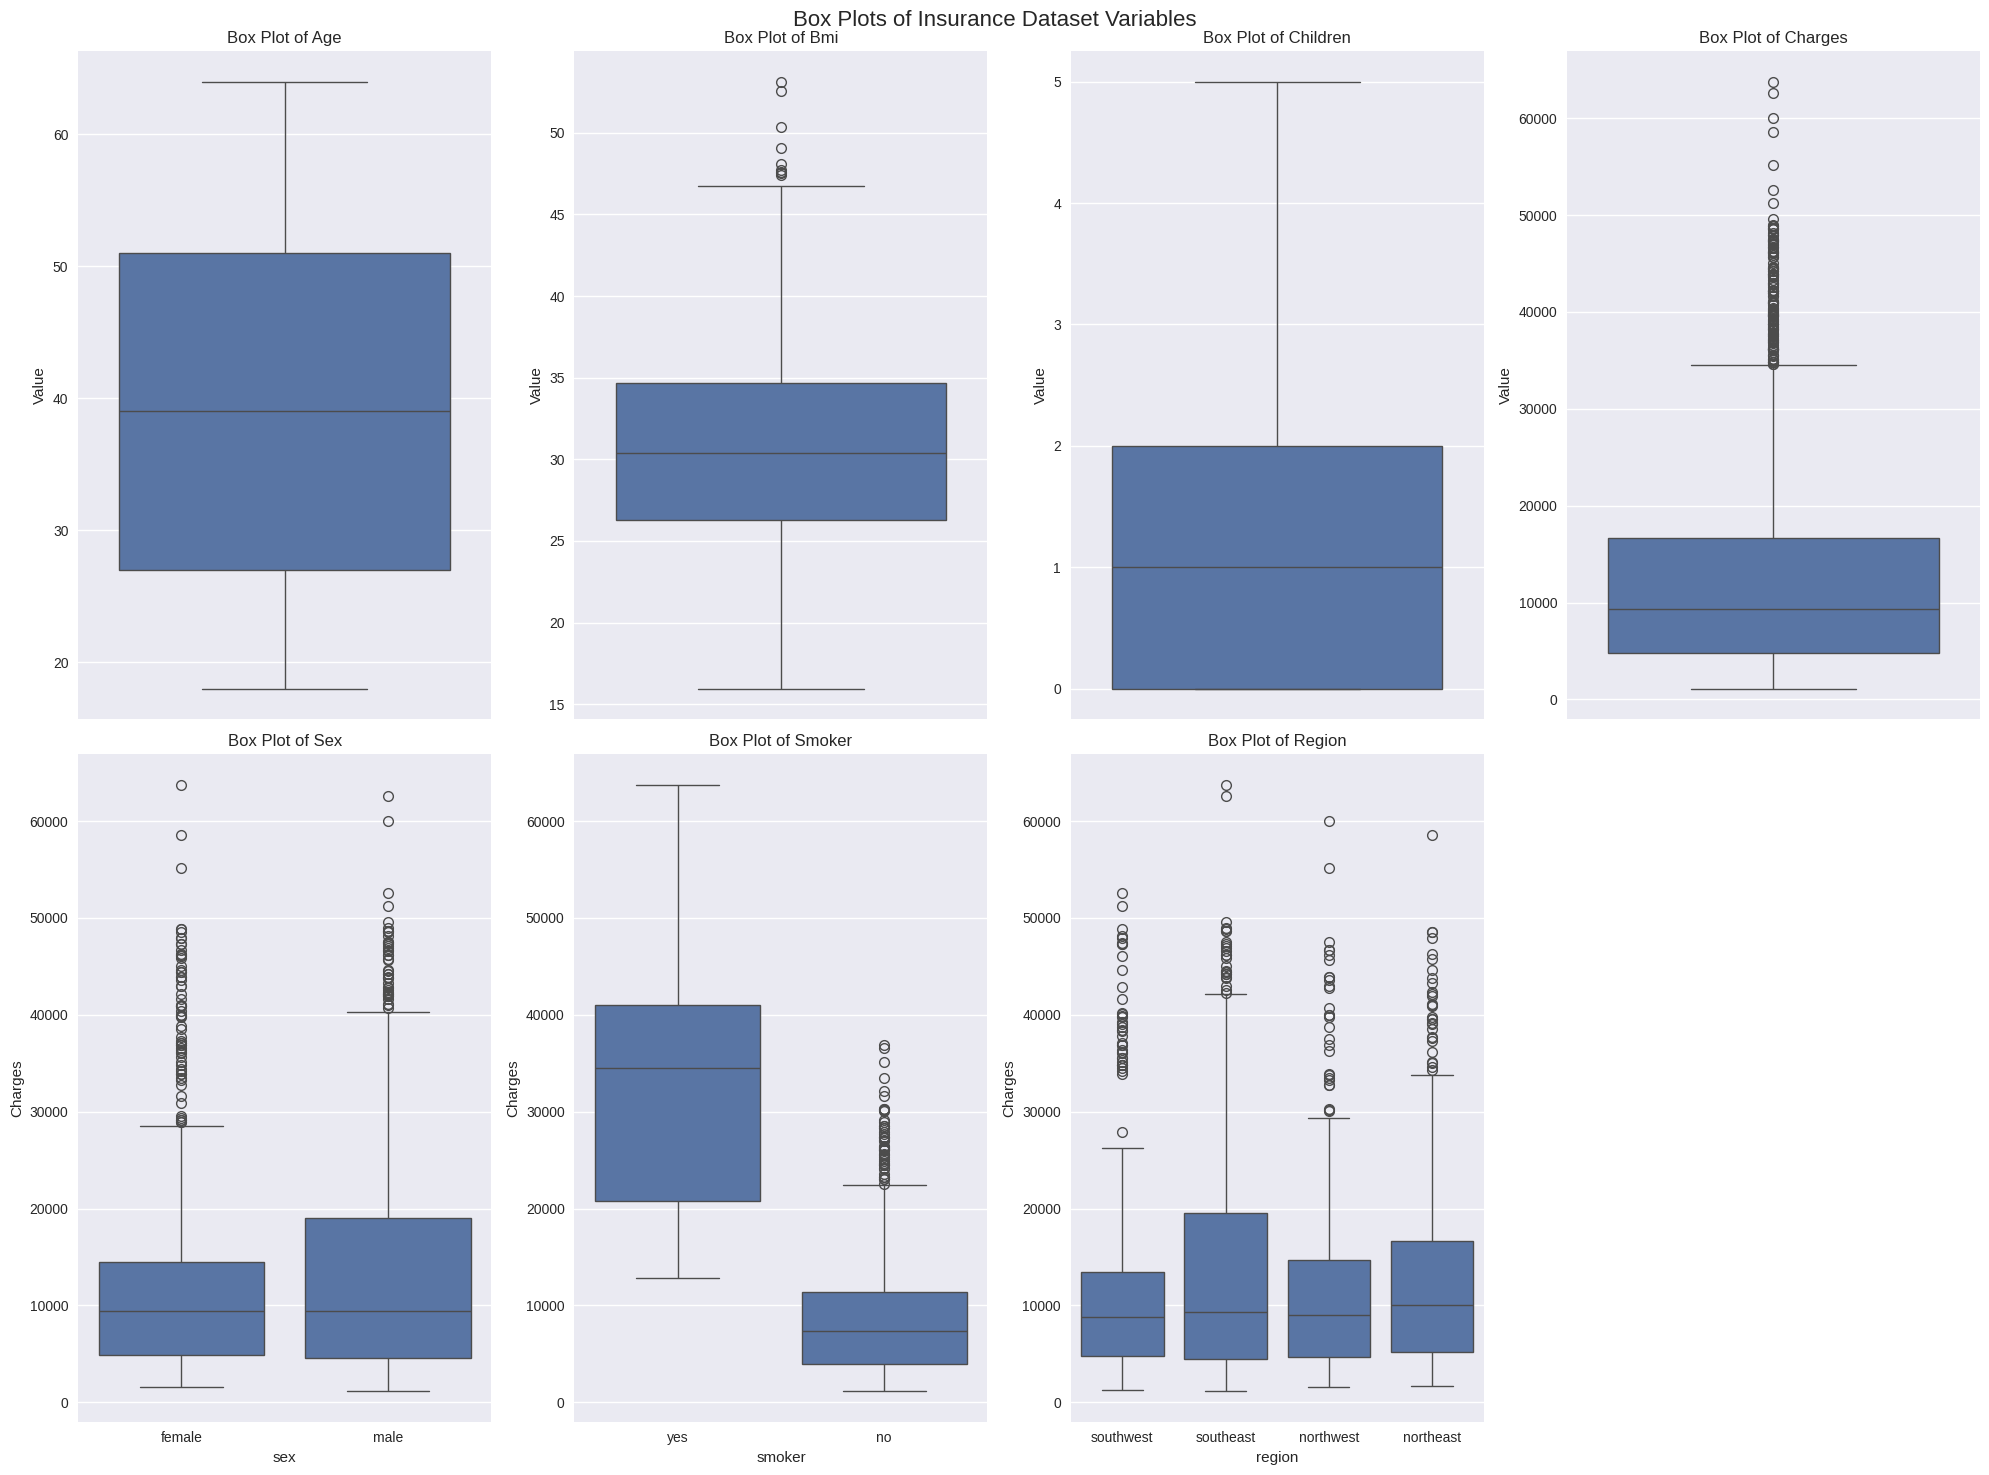

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('datasets_13720_18513_insurance (1).csv')

# Set up the plot style
plt.style.use('seaborn')

# Create subplots with enough space for all variables
fig, axes = plt.subplots(2, 4, figsize=(20, 15))
fig.suptitle('Box Plots of Insurance Dataset Variables', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# List of variables (assuming 'charges' is the dependent variable)
variables = ['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region']

# Create a box plot for each variable
for i, var in enumerate(variables):
    if df[var].dtype in ['int64', 'float64']:  # Numeric variables
        sns.boxplot(y=df[var], ax=axes[i])
    else:  # Categorical variables
        sns.boxplot(x=df[var], y=df['charges'], ax=axes[i])

    axes[i].set_title(f'Box Plot of {var.capitalize()}')
    axes[i].set_ylabel('Value' if df[var].dtype in ['int64', 'float64'] else 'Charges')

# Remove any unused subplots
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [9]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Define numeric_columns - Assuming 'age', 'bmi', 'children', and 'charges' are numeric
numeric_columns = ['age', 'bmi', 'children', 'charges']

for column in numeric_columns:
    outliers = find_outliers_iqr(df[column])
    print(f"\nOutliers in {column}:")
    print(outliers)


Outliers in age:
Series([], Name: age, dtype: int64)

Outliers in bmi:
116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

Outliers in children:
Series([], Name: children, dtype: int64)

Outliers in charges:
14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64


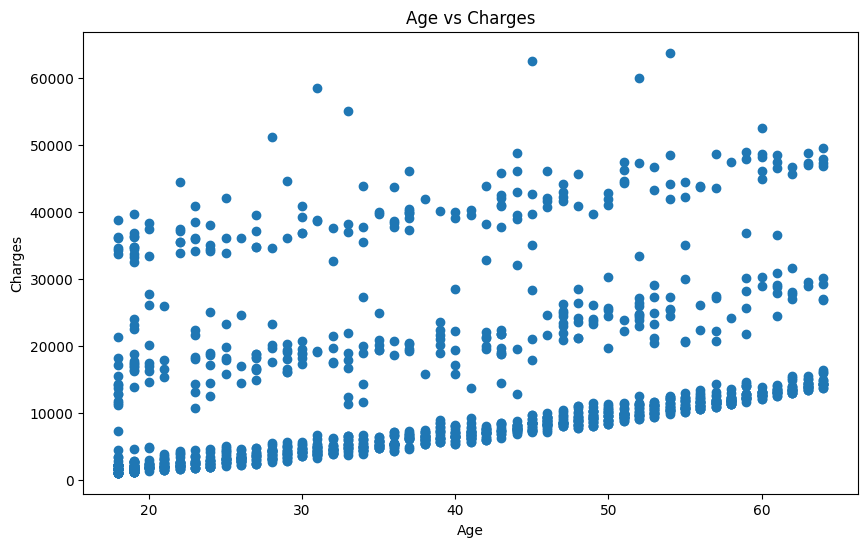

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('charges', axis=1)  # Replace 'target_column' with your actual target column name
y = df['charges']


In [ ]:
# Import the necessary function
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 20% validation from the original train

The dataset has been successfully split:

Training set: 1,070 rows (80% of the data)
Test set: 268 rows (20% of the data)
Both sets contain 6 feature columns and the target variable ("charges").

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()


In [ ]:
numeric_features = ['age', 'bmi', 'children']

In [ ]:
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

In [ ]:
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load and prepare data (as in the previous script)
# ...

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

# List of models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('SVR', SVR()),
    ('KNN', KNeighborsRegressor())
]

# Dictionary to store R2 scores
r2_scores = {}

# Evaluate each model
for name, model in models:
    r2, mse, rmse = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    r2_scores[name] = r2
    print(f"{name}:")
    print(f"  R-squared: {r2:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print()

# Compare models based on R2 scores
print("Model Comparison (R-squared scores):")
for name, score in sorted(r2_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score:.4f}")

# Identify the best model
best_model = max(r2_scores, key=r2_scores.get)
print(f"\nBest performing model based on R-squared: {best_model}")

Linear Regression:
  R-squared: 0.7836
  MSE: 33596915.8514
  RMSE: 5796.2847

Decision Tree:
  R-squared: 0.7372
  MSE: 40795333.4541
  RMSE: 6387.1225

Random Forest:
  R-squared: 0.8656
  MSE: 20864569.5134
  RMSE: 4567.7751

Gradient Boosting:
  R-squared: 0.8793
  MSE: 18745176.4759
  RMSE: 4329.5700

SVR:
  R-squared: -0.0701
  MSE: 166128803.8085
  RMSE: 12889.0963

KNN:
  R-squared: 0.8038
  MSE: 30459865.8232
  RMSE: 5519.0457

Model Comparison (R-squared scores):
Gradient Boosting: 0.8793
Random Forest: 0.8656
KNN: 0.8038
Linear Regression: 0.7836
Decision Tree: 0.7372
SVR: -0.0701

Best performing model based on R-squared: Gradient Boosting


Based on the R-squared scores, Gradient Boosting emerges as the most effective model for predicting medical insurance charges in this dataset. This model provides the highest accuracy and explains the most variance in the data compared to the other models.

Further Considerations:

This analysis only focuses on R-squared scores. You might want to consider other metrics like precision, recall, and F1-score depending on the specific application and business goals.

It's important to consider factors like interpretability and computational cost when choosing the best model.
Further model optimization techniques like feature engineering and hyperparameter tuning can potentially improve the performance of all the models.